In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# Đọc dữ liệu từ các file CSV
bang_giang_vien = pd.read_csv("faculty_info_clean.csv")
bang_khao_sat = pd.read_csv("course_survey_clean.csv")
bang_binh_luan = pd.read_csv("student_comments_clean.csv")


In [42]:
bang_giang_vien.head(), bang_khao_sat.head(), bang_binh_luan.head()


(  faculty_id    full_name     department
 0      GV100   Pham Thi D  Khoa Kinh  Te
 1      GV101  Hoang Van E   Khoa Kinh Tế
 2      GV102     Le Van C    Bộ Môn Toán
 3      GV103  Hoang Van E  Khoa Kinh  Te
 4      GV104   Pham Thi D      Khoa CNTT,
   survey_id faculty_id course_code student_level  rating_score survey_term
 0   SRV1000      GV106       DA200        Nam  2           3.5    HK2024-2
 1   SRV1001      GV120       CT102    Liên Thông           3.5    HK1-2024
 2   SRV1002      GV111       CT101    Liên Thông           3.5    HK1-2024
 3   SRV1003      GV123       CT101           K18           3.5    HK2024-2
 4   SRV1004      GV105       DA200         Năm 1           3.5    HK2024-1,
   survey_id            comment_text sentiment_label
 0   SRV1038    Nội dung mon hoc kho        Tich Cuc
 1   SRV1044    Thay co  cham bai ky       Tich  Cuc
 2   SRV1079  Giang vien day de hieu       Tich  Cuc
 3   SRV1014     Bài giảng hơi nhanh       Tich  Cuc
 4   SRV1099    Nội dung 

In [43]:
so_luong_giang_vien_theo_khoa = (
    bang_giang_vien
    .groupby("department")["faculty_id"]
    .nunique()
    .reset_index(name="so_luong_giang_vien")
)

so_luong_giang_vien_theo_khoa

,department,so_luong_giang_vien
0,Bộ Môn Toán,7
1,Khoa CNTT,9
2,Khoa Kinh Te,3
3,Khoa Kinh Tế,6


In [44]:
so_phieu_khao_sat_theo_giang_vien = (
    bang_khao_sat
    .groupby("faculty_id")["survey_id"]
    .count()
    .reset_index(name="so_phieu_khao_sat")
)

so_phieu_khao_sat_theo_giang_vien


,faculty_id,so_phieu_khao_sat
0,GV100,3
1,GV101,5
2,GV102,3
3,GV103,1
4,GV104,6
5,GV105,6
6,GV106,2
7,GV107,7
8,GV108,5
9,GV110,6


In [45]:
bang_khao_sat_co_khoa = bang_khao_sat.merge(
    bang_giang_vien[["faculty_id", "department"]],
    on="faculty_id",
    how="left"
)

diem_trung_binh_theo_khoa = (
    bang_khao_sat_co_khoa
    .groupby("department")["rating_score"]
    .mean()
    .reset_index(name="diem_danh_gia_trung_binh")
)

diem_trung_binh_theo_khoa


,department,diem_danh_gia_trung_binh
0,Bộ Môn Toán,4.131944
1,Khoa CNTT,3.989130
2,Khoa Kinh Te,4.104167
3,Khoa Kinh Tế,4.076923


In [46]:
diem_trung_binh_theo_trinh_do = (
    bang_khao_sat
    .groupby("student_level")["rating_score"]
    .mean()
    .reset_index(name="diem_danh_gia_trung_binh")
)

diem_trung_binh_theo_trinh_do


,student_level,diem_danh_gia_trung_binh
0,K17,4.181818
1,K18,3.928571
2,Lien Thong,3.727273
3,Liên Thông,4.000000
4,Nam 2,4.071429
5,Nam 1,4.180556
6,Năm 1,4.187500
7,Năm 2,4.022727


In [47]:
phan_bo_cam_xuc = (
    bang_binh_luan
    .groupby("sentiment_label")["comment_text"]
    .count()
    .reset_index(name="so_luong_binh_luan")
)

phan_bo_cam_xuc


,sentiment_label,so_luong_binh_luan
0,Không xác định,12
1,Tich Cuc,9
2,Tich Cuc,11
3,Tieu Cuc,9
4,Tiêu Cực,10
5,Trung Lap,6
6,Trung Lập,9
7,Tích Cực,12


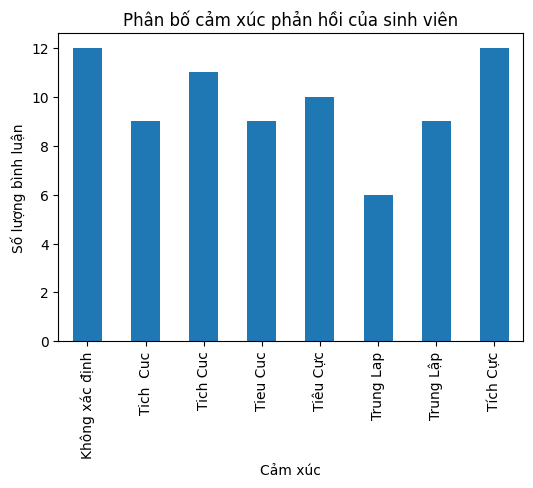

In [48]:
phan_bo_cam_xuc.set_index("sentiment_label").plot(
    kind="bar",
    title="Phân bố cảm xúc phản hồi của sinh viên",
    ylabel="Số lượng bình luận",
    xlabel="Cảm xúc",
    legend=False,
    figsize=(6,4)
)

plt.show()
